### Variance, Standard Deviation, Covariance

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.DataFrame({
    'a':[1,3,4,6,8],
    'b':[2,3,5,6,8],
    'c':[6,5,4,3,2],
    'd':[5,4,3,4,6]
})
df

,a,b,c,d
0,1,2,6,5
1,3,3,5,4
2,4,5,4,3
3,6,6,3,4
4,8,8,2,6


### Variance :
Variance is the spread of values in a dataset around its mean value. It tells you how far each number in the dataset is 
from its mean.
![](https://miro.medium.com/max/830/1*svs4R44GU6esJ-xYiyoIFQ.png)
For **sample variance**, the denominator is n-1. For **population variance**, the denominator is n.
Higher the variance, higher the dispersion of data points.

Why do we subtract 1: When you have an entire population and calculate any parameter (like the population variance or population standard deviation), your results will be accurate. That’s because you have all the data about your population. However, when you work with a sample, you’ve only got a small fraction of the population to work with. Therefore, your answers aren’t going to be as accurate as those you would have got, if you had the entire set of data to work with.


The square root of variance (s²) is the **standard deviation** (s).

The benefit of reporting standard deviation is that it remains in the scale of data. Say, a sample of adult heights is in meters, then standard deviation will also be in meters, whereas the variance will be in meters square.


In [26]:
var = (np.square(df['a'] - df['a'].mean())).sum() / (df.shape[0] - 1)
print(np.var(df['a'], ddof=0))
print(np.std(df['a'], ddof=0))

5.84
2.4166091947189146


### Covariance
Covariance is a measure of how changes in one variable are associated with changes in a second variable.

![](https://miro.medium.com/max/998/1*JxqOikQflNrmsoImC_vnsQ.png)

In [27]:
np.cov(df['a'],df['b'])
# (0, 0) and (1, 1) are the variance of df['a'] and df['b'] respectively and (0, 1) and (1, 0) is the covariance of a and b

array([[7.3 , 6.35],
       [6.35, 5.7 ]])

In [28]:
#type of covariance
'''
1. Positive covariance: 
A positive covariance indicates that both random variables tend to move upward or downward at the same time.'''
print(f'covariance between a and b:', np.cov(df['a'], df['b'])[0][1])

'''
2. Negative covariance:
 A negative covariance indicates that both variables tend to move away from each other — when one moves upward the other moves 
 downward, and vice versa.'''
print(f'covariance between c and b:', np.cov(df['c'],df['b'])[0][1])

covariance between a and b: 6.35
covariance between c and b: -3.75


#### Correlation is a normalized version of the covariance
Correlation is a normalized version of the covariance. 
![](https://miro.medium.com/max/520/1*8C_VvGhYWJFJft8vlmO3sw.png)
By dividing the covariance by the features’ standard deviations, we ensure that the correlation between two features is in the range [-1, 1], which makes it more interpretable than the unbounded covariance.

In [29]:
np.corrcoef(df['a'], df['b'])

# (0, 0) and (1, 1) are the correlation of (a, a) and (b, b) respectively and (0, 1) and (1, 0) is the corr of (a, b)

array([[1.        , 0.98440739],
       [0.98440739, 1.        ]])

### Chi square test (Categorical-Categorical)
The Chi-square test is one of the statistical tests we can use to decide whether there is a correlation between the categorical variables. 

We start by defining the **null hypothesis (H0)** which states that there is **no relation** between the variables. An alternate hypothesis would state that there is a significant relation between the two.

We define a significance factor to determine whether the relation between the variables is of considerable significance. It tells us about the percentage of risk involved in saying that a difference exists between two groups, when in reality it does not.

Generally a significance factor or **alpha value** of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases where we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then H0 holds true.

p_value <= 0.05 then, H0 is rejected else H0 is accepted 

In [30]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.1031971404730939
Independent (H0 holds true)


### z-test and t-test (Numerical-Categorical(2 Categories))

If population standard deviation is known then use Z test else T test.

Z-test is used to compare the mean of two given samples and infer whether they are from the same distribution or not. We do not implement Z-test when the sample size is less than 30.

A Z-Test may be a one-sample Z test or a two-sample Z test.

1. One samples z-test: the mean of a single group against a known mean.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/image1.png)
2. Two sample z-test test: compares the means for two groups.
![](https://editor.analyticsvidhya.com/uploads/77087z-stat.gif)

In [31]:
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import norm, f_oneway

df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here we will consider Gender and ApplicantIncome for z test. 

 - Null Hypothesis: There is no significant difference between the mean Income of males and females.

 - Alternate Hypothesis: There is a significant difference between the mean Income of males and females.

So will use ztest from scipy library and pass array that gives male income and female income and a value. Value will be used to prove or disapprove the hypothesis, for null hypothesis to be true the mean of male and female income should be zero so we will pass the value as 0 (mu1 - mu2 = 0).


In [32]:
Male_income = df.loc[df['Gender']=='Male','ApplicantIncome'].values
Female_income = df.loc[df['Gender']=='Female','ApplicantIncome'].values
val = ztest(Male_income,Female_income, value=0)
print(f'stats: {val[0]} \t p-value: {val[1]}')

if p<0.05:
    print("we reject null hypothesis OR there is a difference in income of male and female.")
else:
    print("we accept null hypothesis OR there is no difference in mean income of male and female.")

stats: 1.3232838129163134 	 p-value: 0.18574101269618304
we accept null hypothesis OR there is no difference in mean income of male and female.


### Anova test (Continuous - Categorical(3 or more))
https://www.reneshbedre.com/blog/anova.html

ANOVA stands for Analysis of variance. It is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. 

In anova test, we calculate the variance between clusters and variance within clusters and then calculate the ratio between them. The ratio, deg of freedoms of betw and within cluster is used to lookup the p_value.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/image046.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/image2-1.png)

The only difference between one-way and two-way ANOVA is the number of independent variables. A one-way ANOVA has one independent variable, while a two-way ANOVA has two.

One-way ANOVA: Testing the relationship between shoe brand (Nike, Adidas, Saucony, Hoka) and race finish times in a marathon.

Two-way ANOVA: Testing the relationship between shoe brand (Nike, Adidas, Saucony, Hoka), runner age group (junior, senior, master’s), and race finishing times in a marathon.
All ANOVAs are designed to test for differences among three or more groups. If you are only testing for a difference between two groups, use a t-test instead.


Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable.

In [33]:
df = pd.DataFrame({'A': [25, 30, 28, 36, 29],
                   'B': [45, 55, 29, 56, 40],
                   'C': [30, 29, 33, 37, 27],
                   'D': [54, 60, 51, 62, 73]})
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [34]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatments', 'value']
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


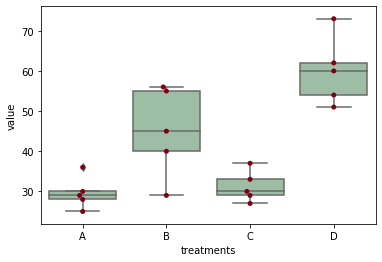

In [35]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis.

In [37]:
# !pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

### Two way anova
From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants.

From two-way ANOVA, we can tests three hypotheses 
1. effect of genotype on yield 
2. effect of time (years) on yield, and 
3. effect of genotype and time (years) interactions on yield

In [38]:
df = pd.DataFrame({'Genotype': ['A','A','A','B','B','B','C','C','C','D','D','D','E','E','E','F','F','F'],
                   '1_year': [1.53,1.83,1.38,3.6,2.94,4.02,3.99,3.3,4.41,3.75,3.63,3.57,1.71,2.01,2.04,3.96,4.77,4.65],
                   '2_year': [4.08,3.84,3.96,5.7,5.07,7.2,6.09,5.88,6.51,5.19,5.37,5.55,3.6,5.1,6.99,5.25,5.28,5.07],
                   '3_year': [6.69,5.97,6.33,8.55,7.95,8.94,10.02,9.63,10.38,11.4,9.66,10.53,6.87,6.93,6.84,9.84,9.87,10.08]})
df

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [39]:
d_melt = pd.melt(df, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


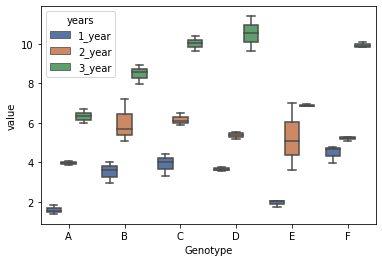

In [40]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="deep") 

In [41]:
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


The p value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (p<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.